In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Look into df for datatypes, if nulls exist
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


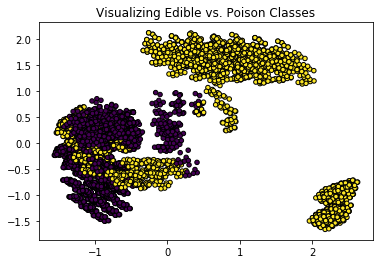

In [124]:
#visualize edible vs poison classes
pca = PCA(n_components=2)
pca.fit(X)

x_pca = X.values
x_pca = pca.fit_transform(x)

plt.scatter(x_pca[:,0], x_pca[:,1], c=y, s=20, edgecolor='k')
plt.title('Visualizing Edible vs. Poison Classes');

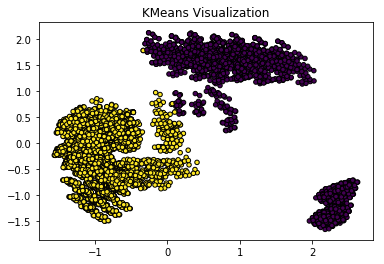

In [138]:
from sklearn.cluster import KMeans

#Specify the model
km = KMeans(n_clusters = 2)
#Fit the model to the data
km.fit(X);

#Annotate the data points with the KMeans prediction
y_pred_km = km.predict(X)

#Plot the data:
plt.scatter(x[:, 0], x[:, 1], c=y_pred_km, s=20, edgecolor='k')
plt.title('KMeans Visualization')
plt.show();

In [169]:
# set features
X = df_dum.drop('class_p', axis=1)
# set independent variable
y = df_dum['class_p']
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [175]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [173]:
#logistic regression
log_model = linear_model.LogisticRegression()
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)
loss = log_loss(y_test, log_probs)
print('Loss value: {}'.format(loss))
print('Training accuracy: {}%'.format(log_model.score(X_train, y_train)))
print('Test accuracy: {}%'.format(log_model.score(X_test, y_test)))

Loss value: 0.007967855223859238
Training accuracy: 1.0%
Test accuracy: 1.0%


In [ ]:
import seaborn as sns
from sklearn import metrics

predictions = log_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)

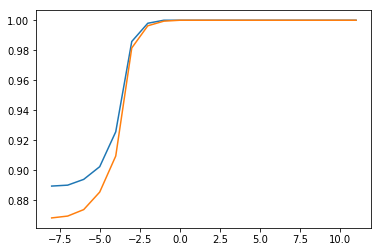

<Figure size 864x576 with 0 Axes>

In [142]:
#SVM checking C
train = []
test = []

value_range = [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,\
               1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,100000000000]
#loop through vaues of C
for i in value_range :
    SVM_model = LinearSVC(C=i)
    SVM_model.fit(X_train, y_train)
    train.append(SVM_model.score(X_train, y_train))
    test.append(SVM_model.score(X_test, y_test))

#plot out results
plt.plot(np.log10(value_range),train)
plt.plot(np.log10(value_range),test)
plt.figure(figsize=(12,8))
plt.show();

In [146]:
#fit SVM model to scaled data
SVM_model = LinearSVC(C=0.01)
SVM_model.fit(X_train, y_train)
print('The normalized training accuracy is: {}%'.format(SVM_model.score(X_train, y_train)))
print('The normalized test accuracy is: {}%'.format(SVM_model.score(X_test, y_test)))

The normalized training accuracy is: 0.9979996922603478%
The normalized test accuracy is: 0.9963076923076923%


In [14]:
print_score(svm_model, X_train, y_train,X_test, y_test, train=True)

NameError: name 'print_score' is not defined

In [147]:
#test out different SVMs using the different kernals
kerns = ['linear', 'rbf', 'sigmoid']
for i in kerns:
    #Kernel trick
    my_kernel_SVM = SVC(C=0.01, kernel='{}'.format(i))
    my_kernel_SVM.fit(X_train_norm,y_train)
    
    #Get the score
    print('{0} Kernal SVM score: {1}'.format(i, (100*my_kernel_SVM.score(X_test_norm,y_test))))

linear Kernal SVM score: 99.87692307692308
rbf Kernal SVM score: 96.06153846153846
sigmoid Kernal SVM score: 98.21538461538462


In [117]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GaussianMixture()
xgb = XGBClassifier()

gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)

print("Gradient Boost score: %3.3f" % (100 * gb.score(X_test,y_test)))
print("XG Boost score: %3.3f"       % (100 * xgb.score(X_test,y_test)))

Gradient Boost score: 10481.355
XG Boost score: 100.000


c:\users\b\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
xgb_fi = xgb.feature_importances_
plot_importance(xgb)
plt.show()

In [ ]:
fscore = clf.best_estimator_.booster().get_fscore()

In [150]:
#testing out random forest  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Default RFR: %3.3f" % (rf.score(X_test, y_test)))

Default RFR: 1.000


In [ ]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [82]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
rfcv = RandomForestClassifier(criterion= 'gini',
 max_depth= 5,
 max_features= 'auto',
 n_estimators= 100)
rfcv.fit(X_train, y_train)
print("Default RFR: %3.3f" % (rfcv.score(X_test, y_test)))

Default RFR: 0.990


In [87]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [99]:
print (np.mean(cross_val_score(SVM_model, X_train, y_train, cv=100)))

0.9336247947454843


In [152]:
from sklearn import metrics
y_pred = rf.predict(X_test)
print("Accuracy: %3.3f" % (metrics.accuracy_score(y_test, y_pred)))

Accuracy: 1.000


In [151]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

odor_n                        0.133796
odor_f                        0.110192
gill-size_n                   0.074735
stalk-surface-above-ring_k    0.062608
ring-type_p                   0.052115
stalk-surface-below-ring_k    0.046827
population_v                  0.041044
spore-print-color_h           0.037105
spore-print-color_w           0.025261
odor_p                        0.023798
gill-spacing_w                0.023766
bruises_t                     0.023026
stalk-surface-above-ring_s    0.022658
ring-type_l                   0.017776
spore-print-color_n           0.016611
odor_c                        0.015915
stalk-shape_t                 0.014202
stalk-root_b                  0.014047
ring-number_t                 0.013453
habitat_g                     0.012947
stalk-root_e                  0.011683
stalk-root_c                  0.011495
odor_s                        0.011482
odor_y                        0.011166
spore-print-color_r           0.009493
habitat_u                

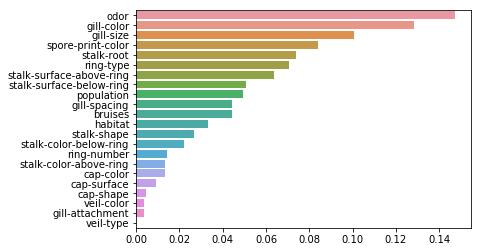

In [40]:
sns.barplot(x=feature_imp, y=feature_imp.index)

In [68]:
#check if removing veil type improves log reg.
X_train_fi = X_train.drop('veil-type', axis=1)
X_test_fi = X_test.drop('veil-type', axis=1)
#test for overfitting
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
print("Default RFR: %3.3f" % (dt.score(X_test, y_test)))

Default RFR: 0.775


In [71]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=1).fit(X_train, y_train)
clf.score(X_test, y_test)  

0.9602132895816243